In [ ]:
#|default_exp utils.download

# Download

> Utility functions for downloading stuff.

In [ ]:
#|export
from fastcore.all import *
import polvo as pv
from polvo.utils.io import open_image

/home/lgvaz/git/polvo/polvo/utils/logging.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
#|hide
from tempfile import TemporaryDirectory

In [ ]:
#|export
def download(url, save_dir, filename=None, chunk_size=1024):
    """Download file from url"""
    import requests
    r = requests.get(url, stream=True)
    save_path = Path(save_dir)/(filename or Path(url).name)
    with open(str(save_path), "wb") as f:
        bar_total = r.headers.get("Content-Length")
        bar = pv.pbar(unit="B", total=int(bar_total) if bar_total else None)
        for chunk in r.iter_content(chunk_size=chunk_size):
            if chunk:  # filter out keep-alive new chunks
                bar.update(len(chunk))
                f.write(chunk)
    return save_path

In [ ]:
#|export
def download_and_extract(url, save_dir, chunk_size=1024):
    save_path = download(url=str(url), save_dir=save_dir, chunk_size=chunk_size)
    import shutil; shutil.unpack_archive(filename=str(save_path), extract_dir=str(save_dir))
    return save_dir

In [ ]:
with TemporaryDirectory() as d:
    download_and_extract('https://s3.amazonaws.com/fast-ai-sample/mnist_tiny.tgz', d)

  0%|          | 0/342207 [00:00<?, ?B/s]

In [ ]:
#|export
def download_gdrive(url):
    """Download from gdrive, passing virus scan for big files."""
    import gdown
    return gdown.download(url=str(url), quiet=False)

In [ ]:
#|export
def download_and_extract_gdrive(url, extract_dir):
    extract_dir = Path(extract_dir)
    extract_dir.mkdir(exist_ok=True, parents=True)

    filename = download_gdrive(url=url)
    import shutil; shutil.unpack_archive(filename=filename, extract_dir=str(extract_dir))

In [ ]:
#|export
@delegates(open_image)
def open_image_url(url, **kwargs):
    path = pv.download(url, pv.mkdir('images', tmp=True, exist_ok=True))
    return pv.open_image(path, **kwargs)

  0%|          | 0/51402 [00:00<?, ?B/s]

<AxesSubplot:>

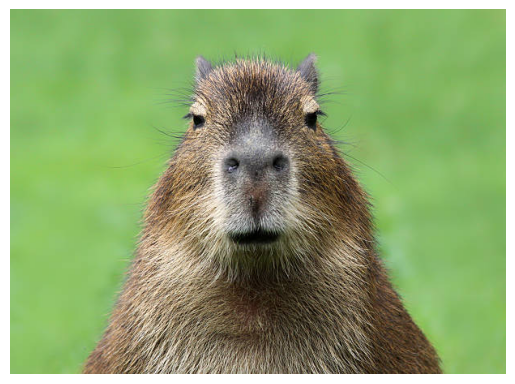

In [ ]:
img = open_image_url('https://media.istockphoto.com/id/177228186/pt/foto/jovem-capivara.jpg?s=612x612&w=0&k=20&c=HIaHC5JhfE3zobczCLIEY6bdy2NdOLq0sskZkuXsM9w=')
pv.show_image(img)

In [ ]:
#|hide
from nbdev import nbdev_export
nbdev_export()